In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**IMPORT LIBRARIES**

---



In [ ]:
import pandas as pd #for csv file
import numpy as np #for arrays, matrices, and linear algebra
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #to visualize data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.impute import SimpleImputer #for imputations
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics


wine = '/content/drive/My Drive/G4_CMSC11-LAB2/Colab Notebooks/wine.csv'
#wine = '/content/drive/MyDrive/wine.csv'

In [ ]:
#Radom forest classifier
from sklearn.ensemble import RandomForestClassifier
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#dataset
data_raw = pd.read_csv(wine)
data_raw.head(10)
#12 attributes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [ ]:
#number of rows and columns of the dataset
data_raw.shape

(1599, 12)

# **Converting Categorical Values to Binary**



---



In [ ]:
# label binarization
data_lb = data_raw.replace({'bad': 1, 'good': 0})

In [ ]:
print(data_lb)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
data_lb.info()
#data_wo is data without media imputation
data_wo = data_lb.copy()
data_wo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        


# **DISTRIBUTION OF THE DATASET**


---




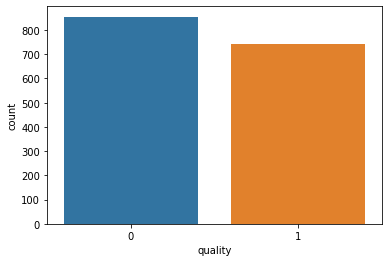

In [ ]:
sns.countplot(x='quality', data = data_lb)

In [ ]:
data_lb['quality'].value_counts()
#The data is balance with a ratio of 53:47

0    855
1    744
Name: quality, dtype: int64

In [ ]:
data_lb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


# **PREPROCESSING: CORRELATION OF THE VARIABLES**

---



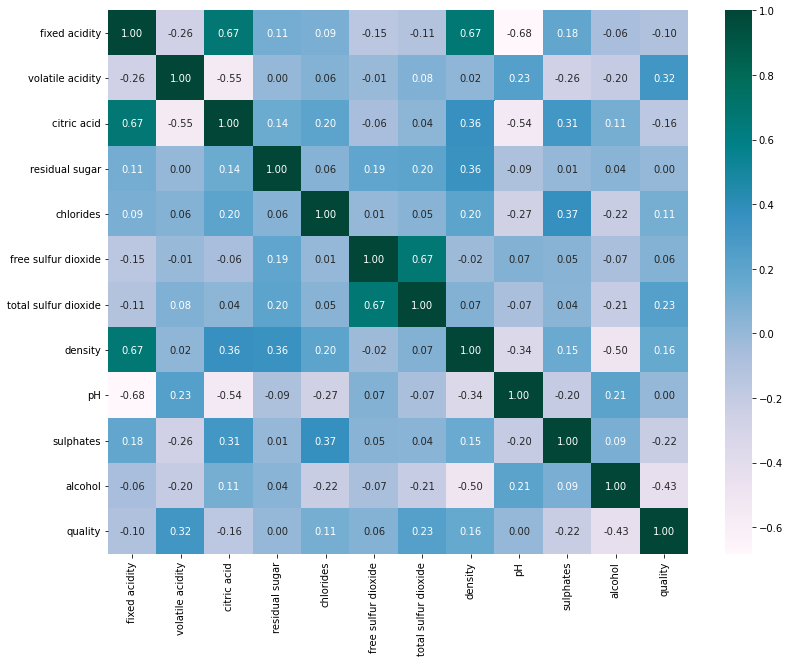

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data_lb.corr(),annot = True, fmt = ".2f", cmap = "PuBuGn")
#correlated density and fixed acidity
#correlated citric acid and fixed acidity

In [ ]:
# sns.pairplot(data_lb)
# plt.show()

# **CHECK MISSING VALUES**



---





In [ ]:
#Convert 0's to Nan
true_value = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
data_lb[true_value] = data_lb[true_value].replace({'0':np.nan, 0:np.nan})

In [ ]:
data_lb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,NaN,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
#Check number of missing values
data_lb.isnull().sum()
#Citric acid should not be deleted; conduct imputation

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

# **DROP DUPLICATES**

---




In [ ]:
#Dropping the duplicates
data_drp = data_lb.drop_duplicates()

In [ ]:
data_wo = data_wo.drop_duplicates()

In [ ]:
#Check for duplicated rows
drp = data_drp[data_drp.duplicated()]
print("\n\nDuplicate Rows : \n {}",format(drp))



Duplicate Rows : 
 {} Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


In [ ]:
data_drp.shape

(1359, 12)

# **CHECK OUTLIERS**

---



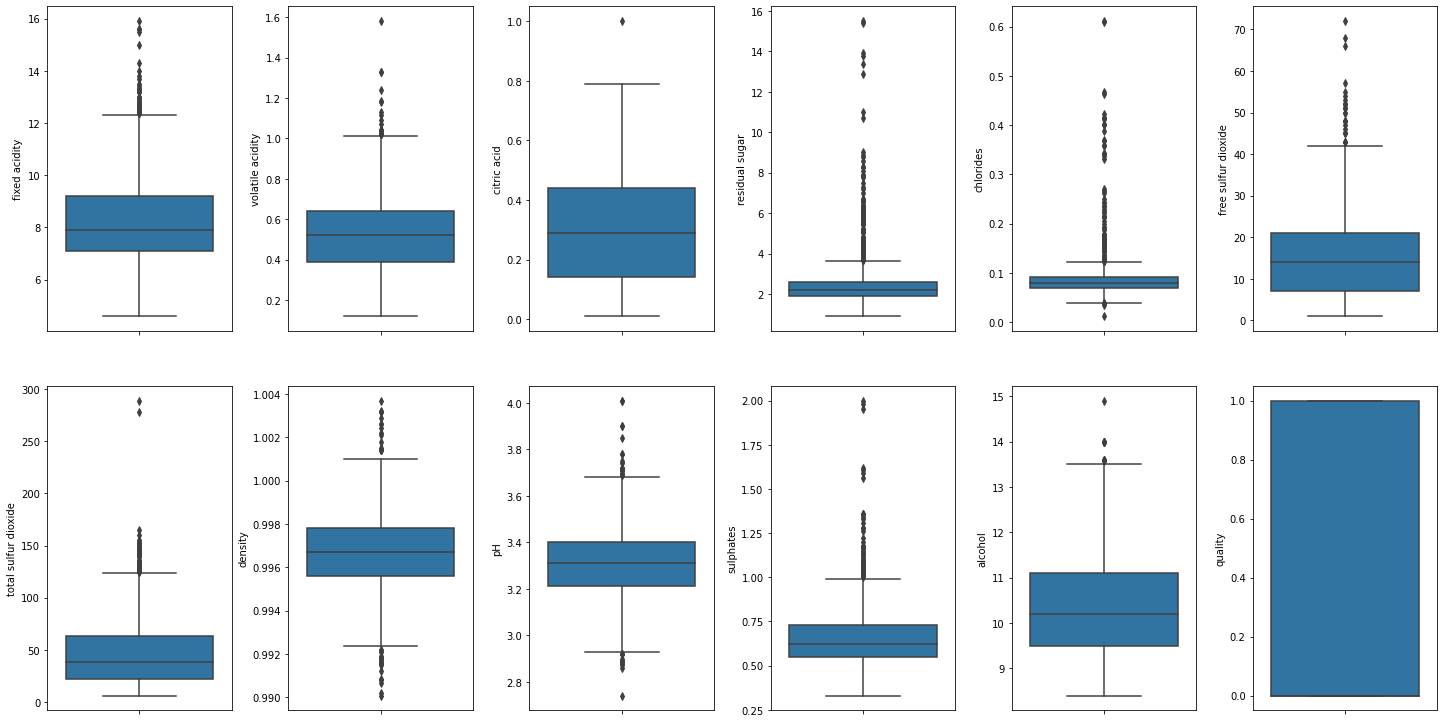

In [ ]:
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data_drp.items():
  if col != 'type':
    sns.boxplot(y=col, data=data_drp, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7,h_pad = 5.0)

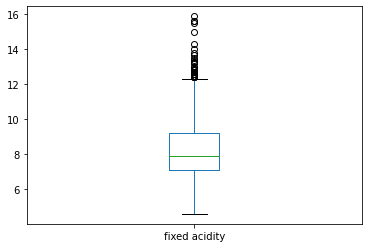

In [ ]:
data_drp.boxplot(column =['fixed acidity'], grid = False)

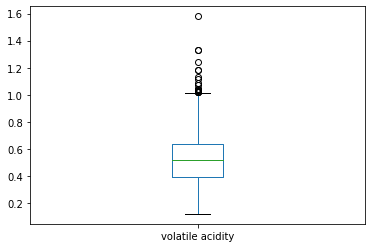

In [ ]:
data_drp.boxplot(column =['volatile acidity'], grid = False)

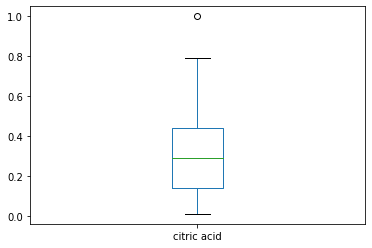

In [ ]:
data_drp.boxplot(column =['citric acid'], grid = False)

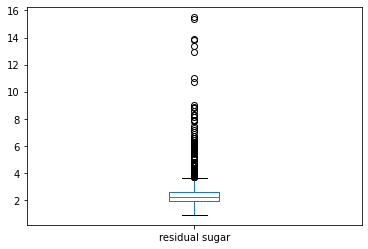

In [ ]:
data_drp.boxplot(column =['residual sugar'], grid = False)

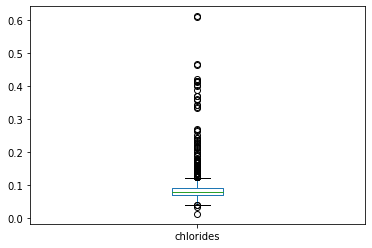

In [ ]:
data_drp.boxplot(column =['chlorides'], grid = False)

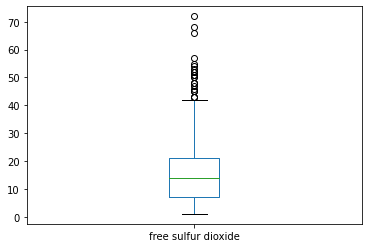

In [ ]:
data_drp.boxplot(column =['free sulfur dioxide'], grid = False)

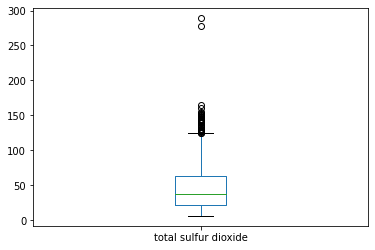

In [ ]:
data_drp.boxplot(column =['total sulfur dioxide'], grid = False)

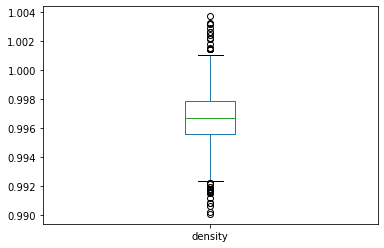

In [ ]:
data_drp.boxplot(column =['density'], grid = False)

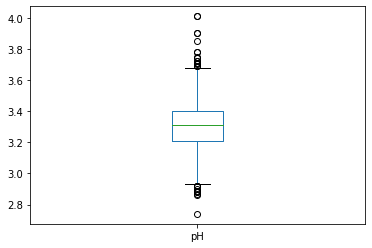

In [ ]:
data_drp.boxplot(column =['pH'], grid = False)

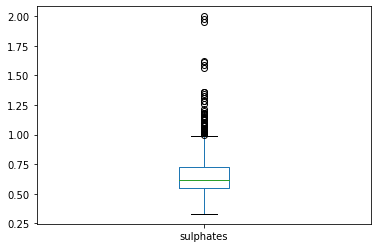

In [ ]:
data_drp.boxplot(column =['sulphates'], grid = False)

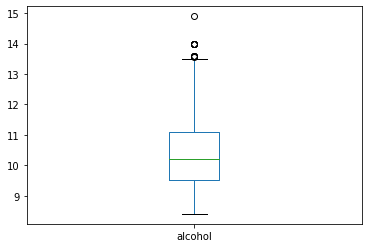

In [ ]:
data_drp.boxplot(column =['alcohol'], grid = False)

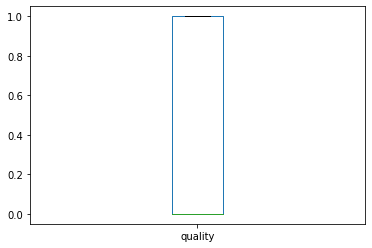

In [ ]:
data_drp.boxplot(column =['quality'], grid = False)

# **CONVERTING OUTLIERS INTO NULL**

---





In [ ]:
#Convert outliers into NULL using IQR Method
for x in data_drp.columns:
    q75,q25 = np.percentile(data_drp.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    for y in range(len(data_drp[x])):
      num = data_drp[x].iloc[ y ]
      if num < min:
        data_drp[x].iloc[y] = np.nan
      elif num > max:
        data_drp[x].iloc[ y ] = np.nan
data_drp_null = data_drp

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Convert outliers into NULL using IQR Method
for x in data_wo.columns:
    q75,q25 = np.percentile(data_wo.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    for y in range(len(data_wo[x])):
      num = data_wo[x].iloc[ y ]
      if num < min:
        data_wo[x].iloc[y] = np.nan
      elif num > max:
        data_wo[x].iloc[ y ] = np.nan
data_wo = data_wo.dropna()

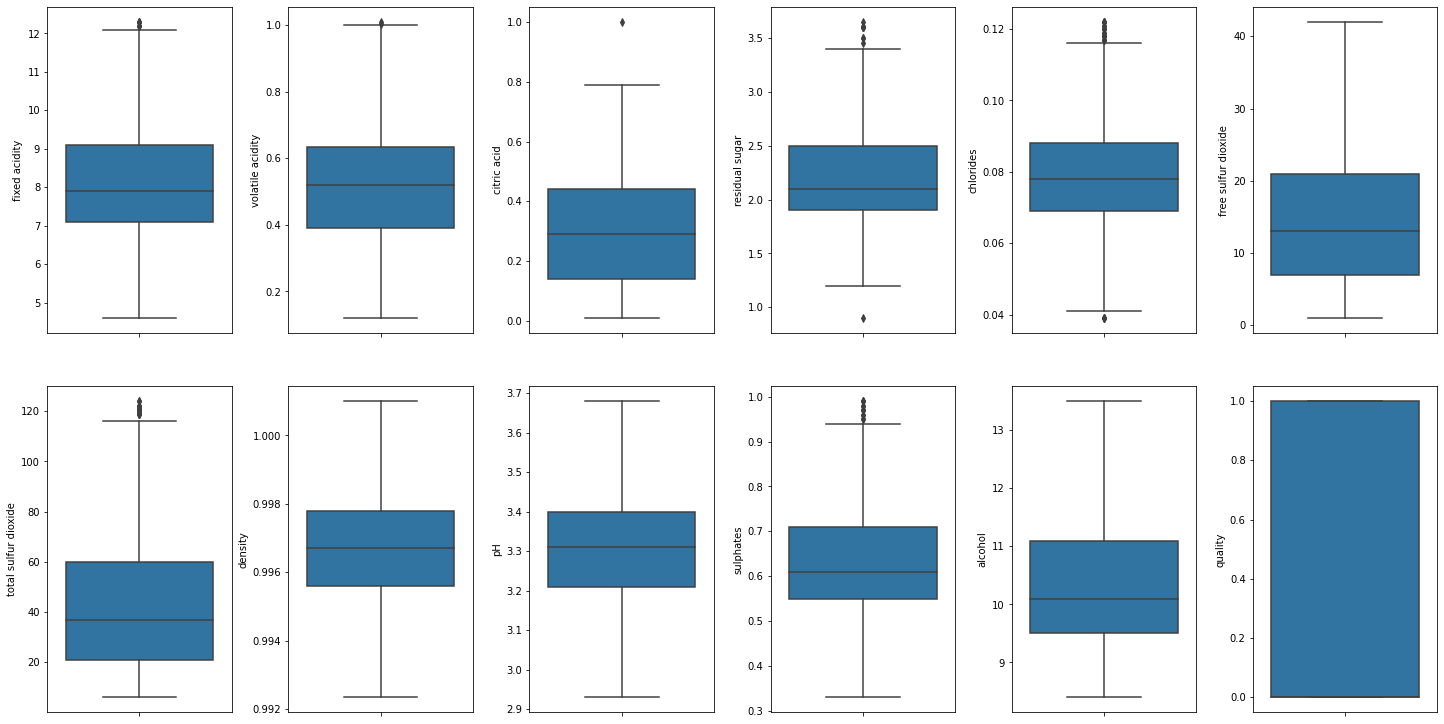

In [ ]:
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data_drp_null.items():
  if col != 'type':
    sns.boxplot(y=col, data=data_drp_null, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7,h_pad = 5.0)

# **Imputation using Median**

---



In [ ]:
#Since there are many outliers, we impute it using median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(data_drp_null.values)
data_median = imp_median.transform(data_drp_null.values)
data_median = pd.DataFrame(data_median)
data_median.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [ ]:
data_median.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.29,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.88,0.29,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.0
4,7.4,0.66,0.29,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1.0


In [ ]:
#Check if there is missing values
data_median.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

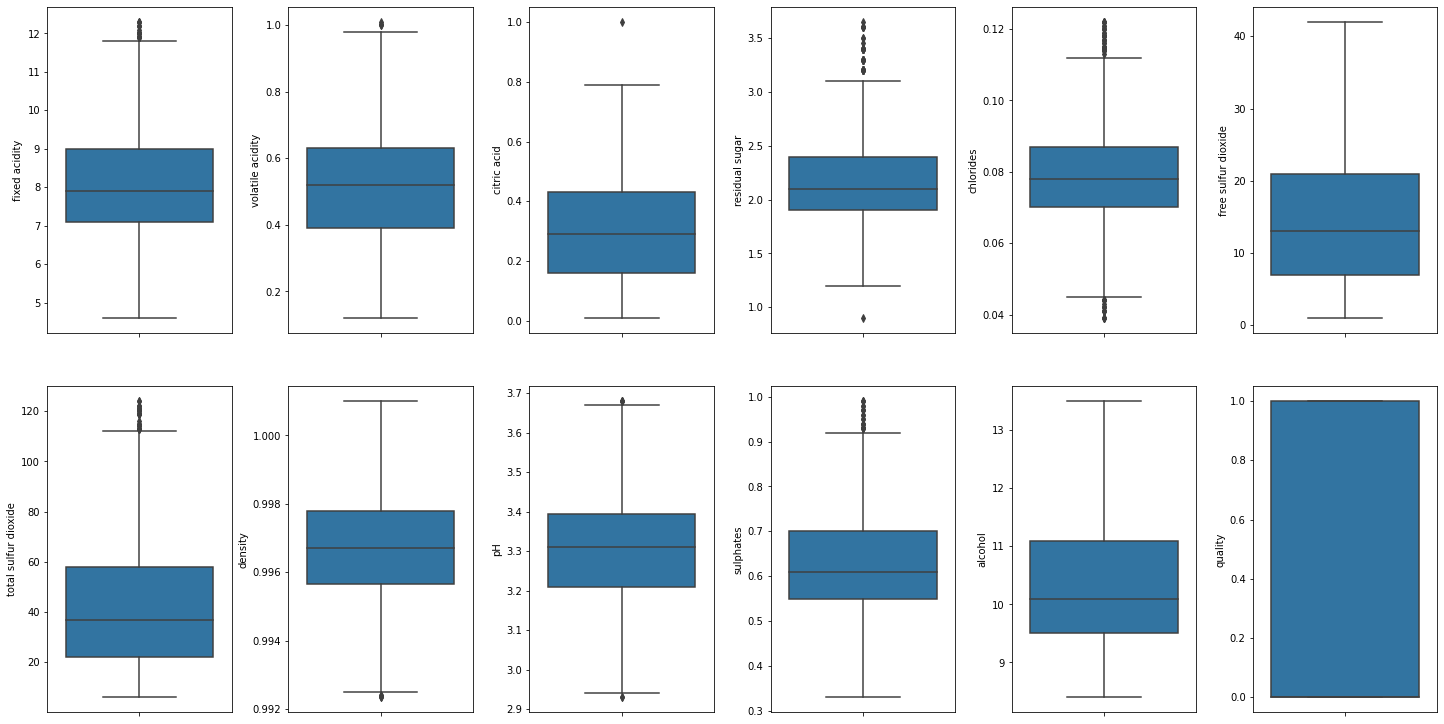

In [ ]:
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data_median.items():
  if col != 'type':
    sns.boxplot(y=col, data=data_median, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7,h_pad = 5.0)

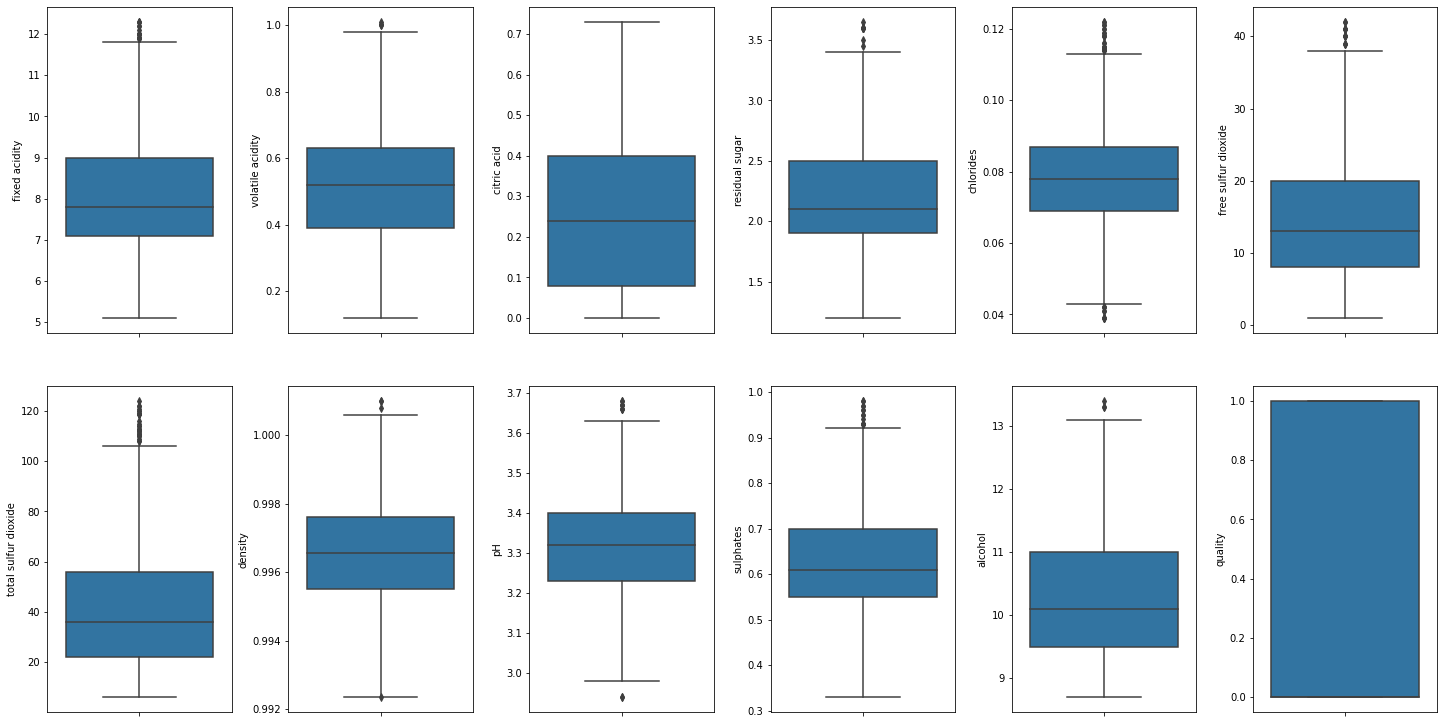

In [ ]:
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in data_wo.items():
  if col != 'type':
    sns.boxplot(y=col, data=data_wo, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7,h_pad = 5.0)

In [ ]:
data_median.shape

(1359, 12)

# **DATA NORMALIZATION**

---



In [ ]:
#Scaling data after median imputation
minmaxScale = MinMaxScaler()
X = minmaxScale.fit_transform(data_median.values)
transformedDF = minmaxScale.transform(X)
data_transformedDF = pd.DataFrame(X)
data_transformedDF.columns =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']
#Show top 5 rows
data_transformedDF.head()


#Scaling data without median imputation
Y = minmaxScale.fit_transform(data_wo.values)
transformedDF_wo = minmaxScale.transform(Y)
data_transformedDF_wo = pd.DataFrame(Y)
data_transformedDF_wo.columns =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']
#Show top 5 rows
data_transformedDF_wo.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
0,0.319444,0.651685,0.000000,0.285714,0.445783,0.243902,0.237288,0.630058,0.770270,0.353846,0.148936,1.0
1,0.375000,0.853933,0.000000,0.571429,0.710843,0.585366,0.516949,0.514451,0.351351,0.538462,0.234043,1.0
2,0.375000,0.719101,0.054795,0.448980,0.638554,0.341463,0.406780,0.537572,0.432432,0.492308,0.234043,1.0
3,0.847222,0.179775,0.767123,0.285714,0.433735,0.390244,0.457627,0.653179,0.297297,0.384615,0.234043,0.0
4,0.319444,0.606742,0.000000,0.244898,0.433735,0.292683,0.288136,0.630058,0.770270,0.353846,0.148936,1.0


# **CORRELATION MATRIX**

---



In [ ]:
#statistical measures of the dataset
data_transformedDF_wo.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,0.426371,0.452255,0.343568,0.407683,0.475330,0.340482,0.308378,0.485213,0.516736,0.463441,0.358716,0.461237
std,0.204871,0.188049,0.249744,0.184577,0.180402,0.215584,0.225642,0.186861,0.179174,0.176709,0.211143,0.498740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.303371,0.109589,0.285714,0.361446,0.170732,0.135593,0.364162,0.391892,0.338462,0.170213,0.000000
50%,0.375000,0.449438,0.328767,0.367347,0.469880,0.292683,0.254237,0.486705,0.513514,0.430769,0.297872,0.000000
75%,0.541667,0.573034,0.547945,0.530612,0.578313,0.463415,0.423729,0.606936,0.621622,0.569231,0.489362,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#statistical measures of the dataset
data_transformedDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,0.461015,0.450472,0.290417,0.465596,0.478577,0.345358,0.315215,0.503999,0.503086,0.460878,0.391904,0.470935
std,0.194255,0.188195,0.178370,0.158507,0.181376,0.223113,0.231167,0.190774,0.186321,0.177555,0.202159,0.499338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324675,0.303371,0.151515,0.363636,0.373494,0.146341,0.135593,0.382081,0.373333,0.333333,0.215686,0.000000
50%,0.428571,0.449438,0.282828,0.436364,0.469880,0.292683,0.262712,0.502890,0.506667,0.424242,0.333333,0.000000
75%,0.571429,0.573034,0.424242,0.545455,0.578313,0.487805,0.440678,0.630058,0.620000,0.560606,0.529412,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Splitting the dataset
features = data_transformedDF.drop(["quality"], axis = 1)
outcome_variable = data_transformedDF["quality"]
x_train, x_test, y_train, y_test = train_test_split(features, outcome_variable, test_size = 0.20, random_state = 7)

#Splitting the dataset for data_lb
features_wo = data_transformedDF_wo.drop(["quality"], axis = 1)
outcome_variable_wo = data_transformedDF_wo["quality"]
x_train_wo, x_test_wo, y_train_wo, y_test_wo = train_test_split(features_wo, outcome_variable_wo, test_size = 0.20, random_state = 7)

# **CROSS VALIDATION**

---



In [ ]:
def cross_validation(model, _X, _y, _cv=10):
    '''Function to perform 10 Folds Cross-Validation
    Parameters
    -------------
    model: Python Class, default = None
        This is the machine learning algorithm to be used for training.
    _X: array
      This is the matric of features.
    _y: array
      This is the target variable.
    _cv: int, default = 10
      Determines the number of folds for cross-validation.
    Returns
    ---------
    The function returns a dictionary containing the metrics 'accuracy', 'precision', 
    'recall', 'f1' for both training set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator = model,
                              X=_X,
                              y=_y,
                              cv=_cv,
                              scoring=_scoring,
                              return_train_score = True)
    
    return {"Training Accuracy scores": results['train_accuracy'],
            "Mean Training Accuracy": results['train_accuracy'].mean()*100,
            "Mean Training Precision": results['train_precision'].mean()*100,
            "Mean Training Recall": results['train_recall'].mean()*100,
            "Mean Training F1 Score": results['train_f1'].mean()*100,
            }


# **ALGORITHMS AND TEST THE MODELS**

---


In [ ]:
#Logistic Regression
lr = LogisticRegression()
cross_validation(lr, x_train, y_train, 10)

{'Training Accuracy scores': array([0.7402863 , 0.74437628, 0.74335378, 0.7597137 , 0.74130879,
        0.74233129, 0.73721881, 0.74259448, 0.73850868, 0.74055158]),
 'Mean Training Accuracy': 74.30243706799851,
 'Mean Training Precision': 71.06539794729818,
 'Mean Training Recall': 72.5170068027211,
 'Mean Training F1 Score': 71.78246266869566}

In [ ]:
#Logistic Regression No Median Imputation
cross_validation(lr, x_train_wo, y_train_wo, 10)

{'Training Accuracy scores': array([0.74488404, 0.74079127, 0.74761255, 0.74897681, 0.74897681,
        0.7479564 , 0.74659401, 0.74659401, 0.7506812 , 0.74386921]),
 'Mean Training Accuracy': 74.66936296285283,
 'Mean Training Precision': 71.6350068133623,
 'Mean Training Recall': 75.85315329139173,
 'Mean Training F1 Score': 73.68270134642987}

In [ ]:
#Test prediction for Logistic Regression No Median Imputation
lr_fitted_wo = lr.fit(x_train_wo, y_train_wo)
y_pred_wo = lr_fitted_wo.predict(x_test_wo)
print(confusion_matrix(y_test_wo, y_pred_wo))
print('Accuracy: %.3f'  % accuracy_score(y_test_wo, y_pred_wo) +
      ' Precision: %.3f'  % precision_score(y_test_wo, y_pred_wo) +
      ' Recall: %.3f' % recall_score(y_test_wo, y_pred_wo) +
      ' F1-score: %.3f' % f1_score(y_test_wo, y_pred_wo))

[[87 28]
 [31 58]]
Accuracy: 0.711 Precision: 0.674 Recall: 0.652 F1-score: 0.663


In [ ]:
#Test prediction for Logistic Regression
lr_fitted = lr.fit(x_train, y_train)
y_pred = lr_fitted.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy: %.3f'  % accuracy_score(y_test, y_pred) +
      ' Precision: %.3f'  % precision_score(y_test, y_pred) +
      ' Recall: %.3f' % recall_score(y_test, y_pred) +
      ' F1-score: %.3f' % f1_score(y_test, y_pred))

[[ 96  26]
 [ 48 102]]
Accuracy: 0.728 Precision: 0.797 Recall: 0.680 F1-score: 0.734


In [ ]:
#Naive Bayes
gb = GaussianNB()
cross_validation(gb, x_train, y_train, 10)

{'Training Accuracy scores': array([0.72903885, 0.72597137, 0.73210634, 0.74437628, 0.72801636,
        0.72597137, 0.72188139, 0.73237998, 0.72829418, 0.73544433]),
 'Mean Training Accuracy': 73.03480451443504,
 'Mean Training Precision': 67.72806949942459,
 'Mean Training Recall': 76.75736961451246,
 'Mean Training F1 Score': 71.95995610390423}

In [ ]:
#Naive Bayes No Median Imputation
cross_validation(gb, x_train_wo, y_train_wo, 10)

{'Training Accuracy scores': array([0.74079127, 0.72987722, 0.73942701, 0.73533424, 0.7366985 ,
        0.73433243, 0.73841962, 0.74386921, 0.74250681, 0.73297003]),
 'Mean Training Accuracy': 73.74226332752191,
 'Mean Training Precision': 68.7577032322687,
 'Mean Training Recall': 80.34380168107343,
 'Mean Training F1 Score': 74.0990664755013}

In [ ]:
#Test prediction for Naive Bayes No Median Imputation
gb_fitted_wo = gb.fit(x_train_wo, y_train_wo)
y_pred_wo = gb_fitted_wo.predict(x_test_wo)
print(confusion_matrix(y_test_wo, y_pred_wo))
print('Accuracy: %.3f'  % accuracy_score(y_test_wo, y_pred_wo) +
      ' Precision: %.3f'  % precision_score(y_test_wo, y_pred_wo) +
      ' Recall: %.3f' % recall_score(y_test_wo, y_pred_wo) +
      ' F1-score: %.3f' % f1_score(y_test_wo, y_pred_wo))

[[79 36]
 [24 65]]
Accuracy: 0.706 Precision: 0.644 Recall: 0.730 F1-score: 0.684


In [ ]:
#Test prediction for Naive Bayes
gb_fitted = gb.fit(x_train, y_train)
y_pred = gb_fitted.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy: %.3f'  % accuracy_score(y_test, y_pred) +
      ' Precision: %.3f'  % precision_score(y_test, y_pred) +
      ' Recall: %.3f' % recall_score(y_test, y_pred) +
      ' F1-score: %.3f' % f1_score(y_test, y_pred))

[[ 86  36]
 [ 38 112]]
Accuracy: 0.728 Precision: 0.757 Recall: 0.747 F1-score: 0.752


In [ ]:
#KNN
knn = KNeighborsClassifier()
cross_validation(knn, x_train, y_train, 10)

{'Training Accuracy scores': array([0.80981595, 0.80470348, 0.81697342, 0.80674847, 0.81083845,
        0.79856851, 0.8006135 , 0.79264556, 0.80081716, 0.81103166]),
 'Mean Training Accuracy': 80.5275614071368,
 'Mean Training Precision': 79.93390852363207,
 'Mean Training Recall': 75.85034013605443,
 'Mean Training F1 Score': 77.83535091250164}

In [ ]:
#Test prediction for KNN
knn_fitted = knn.fit(x_train, y_train)
y_pred = knn_fitted.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy: %.3f'  % accuracy_score(y_test, y_pred) +
      ' Precision: %.3f'  % precision_score(y_test, y_pred) +
      ' Recall: %.3f' % recall_score(y_test, y_pred) +
      ' F1-score: %.3f' % f1_score(y_test, y_pred))

[[93 29]
 [58 92]]
Accuracy: 0.680 Precision: 0.760 Recall: 0.613 F1-score: 0.679


In [ ]:
#KNN No Median Imputation
cross_validation(knn, x_train_wo, y_train_wo, 10)

{'Training Accuracy scores': array([0.81718963, 0.80354707, 0.81991814, 0.82401091, 0.82401091,
        0.81743869, 0.8133515 , 0.82152589, 0.82152589, 0.81880109]),
 'Mean Training Accuracy': 81.81319722985305,
 'Mean Training Precision': 82.41569405939877,
 'Mean Training Recall': 77.69022897379503,
 'Mean Training F1 Score': 79.97780568901278}

In [ ]:
#Test prediction for KNN No Median Imputation
knn_fitted_wo = knn.fit(x_train_wo, y_train_wo)
y_pred_wo = knn_fitted_wo.predict(x_test_wo)
print(confusion_matrix(y_test_wo, y_pred_wo))
print('Accuracy: %.3f'  % accuracy_score(y_test_wo, y_pred_wo) +
      ' Precision: %.3f'  % precision_score(y_test_wo, y_pred_wo) +
      ' Recall: %.3f' % recall_score(y_test_wo, y_pred_wo) +
      ' F1-score: %.3f' % f1_score(y_test_wo, y_pred_wo))

[[86 29]
 [37 52]]
Accuracy: 0.676 Precision: 0.642 Recall: 0.584 F1-score: 0.612


# **FEATURE SELECTION**

---



In [ ]:
#RFE - Logistic Regression
from sklearn.feature_selection import RFE
selector = RFE(lr, n_features_to_select = 5, step = 1)
selector = selector.fit(x_train, y_train)
pd.DataFrame(selector.support_,index=x_train.columns,columns=['Inclusion'])

,Inclusion
fixed acidity,False
volatile acidity,True
citric acid,False
residual sugar,False
chlorides,True
free sulfur dioxide,False
total sulfur dioxide,True
density,False
ph,False
sulphates,True


In [ ]:
y_pred = selector.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred) +
      ' Recall: %.3f' % recall_score(y_test, y_pred)  +
      ' Precision: %.3f' % precision_score(y_test, y_pred)  +
      ' F1-score: %.3f' % f1_score(y_test, y_pred))

[[ 96  26]
 [ 44 106]]
Accuracy: 0.743 Recall: 0.707 Precision: 0.803 F1-score: 0.752


In [ ]:
input_data = (8.1,	0.66,	0.22,	2.2,	0.069,	9,	23,	0.9968,	3.3,	1.2,	10.3)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

models = [lr, gb, knn]
for type in range(len(models)):
  prediction = models[type].predict(input_data_reshaped)
  print(models[type], prediction)

  if (prediction[0]==1):
    print('Good Quality Wine\n')
  else:
    print('Bad Quality Wine\n')

LogisticRegression() [0.]
Bad Quality Wine

GaussianNB() [1.]
Good Quality Wine

KNeighborsClassifier() [1.]
Good Quality Wine



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# **CONFUSION MATRIX**

---



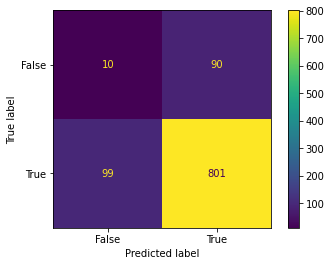

In [ ]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()